In [49]:
# chapter 4

In [50]:
# chapter 4.1 선형회귀

In [51]:
# 정규방정식

$$\widehat{\theta}=(X^TX)^{-1}X^Ty$$

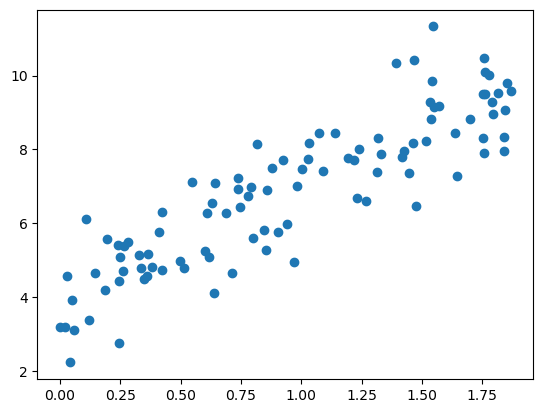

In [52]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.show()

In [53]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.91643517]
 [3.06845159]]


In [54]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.91643517]
 [10.05333835]]


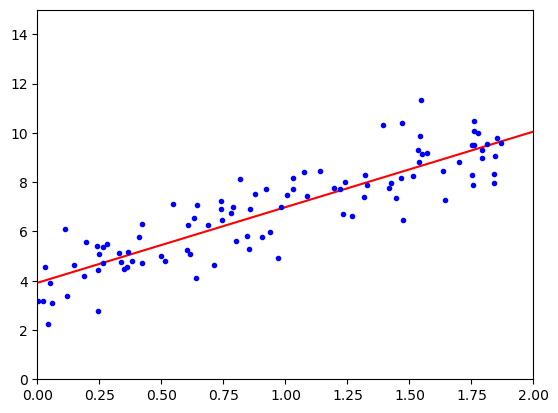

In [55]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [57]:
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.91643517] [[3.06845159]]
[[ 3.91643517]
 [10.05333835]]


In [58]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[3.91643517]
 [3.06845159]]


In [59]:
print(np.linalg.pinv(X_b).dot(y))

[[3.91643517]
 [3.06845159]]


In [60]:
# chapter 4.2 경사 하강법

In [61]:
# chapter 4.2.1 배치 경사 하강법 (batch gradient descent)

In [62]:
# 비용 함수의 편도함수

$${\partial\over\partial \theta_j}MSE(\theta) = {2\over m}\sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)})x_j^{(i)}$$

In [63]:
# 비용 함수의 그레이디언트 벡터

$$\nabla_\theta MSE(\theta) = \begin{pmatrix} {\partial\over\partial \theta_0}MSE(\theta) \\ {\partial\over\partial \theta_1}MSE(\theta) \\ \vdots \\ {\partial\over\partial \theta_n}MSE(\theta) \end{pmatrix}= {2 \over m} X^T (X\theta - y)$$

In [64]:
# 경사 하강법의 스텝

$$\theta^{(next\;step)} = \theta - \eta \nabla_\theta MSE(\theta)$$

In [65]:
# 구현

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[3.91643517]
 [3.06845159]]


In [66]:
# 4.2.2 확률적 경사 하강법

In [67]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.93043617]
 [3.03259209]]


In [68]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [69]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89675435]), array([3.02568478]))

In [70]:
# 4.2.3 미니배치 경사 하강법

# SGD를 할때 임의의 작은 세트 mini-batch 로 그래디언트를 계산한다.

In [71]:
# 4.3 다항 회귀

In [72]:
# 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련 시키는 것.

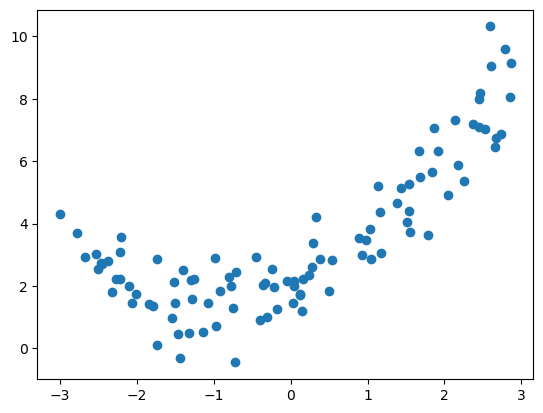

In [73]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.2954018]
[-1.2954018   1.67806583]


In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.00925691] [[0.97908924 0.49726186]]


In [76]:
# 4.4 학습 곡선

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.ylim(0, 5)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train_set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val_set")
    plt.legend()

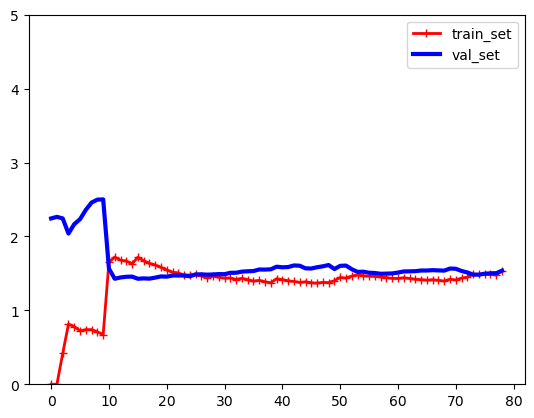

In [78]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

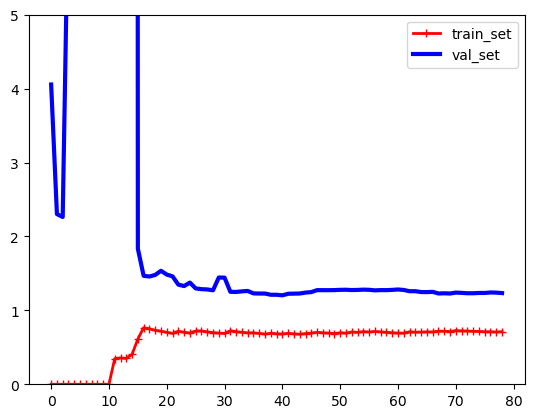

In [79]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [80]:
# 4.5 규제가 있는 선형모델

In [81]:
# 4.5.1 릿지 회귀

In [82]:
# 릿지 회귀의 비용함수

$$J(\theta) = MSE(\theta) + \alpha {1\over 2} \sum_{i=1}^n \theta_i^2$$

In [83]:
# 릿지 회귀의 정규방정식

$$\widehat{\theta} = (X^T X + \alpha A)^{-1} X^T y$$

In [84]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.00567934]])

In [85]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.98589139])

In [86]:
# 4.5.2 라쏘 회귀

In [87]:
# 라쏘 회귀의 비용 함수

$$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n \left\vert \theta_i \right\vert$$

In [88]:
# 라쏘 회귀의 서브그레디언트 벡터

$$g(\theta, J) = \nabla_\theta MSE(\theta) + \alpha \begin{pmatrix} sign(\theta_1) \\ sign(\theta_2) \\ \vdots \\ sign(\theta_n) \end{pmatrix} 여기서 sign(\theta_i) = \left\{\begin{matrix} -1 \quad \theta_i < 0 \\ 0 \quad \theta_i = 0 \\ 1 \quad \theta_i > 0 \end{matrix} \right. $$

In [89]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.95946933])

In [90]:
# 4.5.3 엘라스틱넷 - 릿지 회귀와 라쏘 회귀를 절충한 모델

In [91]:
# 엘라스틱넷 비용 함수

$$J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^n \left\vert \theta_i \right\vert + {1 - r\over 2}\alpha \sum_{i=1}^n \theta_i^2$$

In [92]:
# 3가지 규제중 무엇을 사용해야 하는가?

# 릿지가 기본. 
# 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 좋다.
# 특성 수가 훈련 샘플 수보다 많거나, 특성 몇 개가 강하게 연관되어 있을 때는 라쏘보다는 엘라스틱넷.

In [93]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.95879676])

In [94]:
# 4.5.4 조기 종료

In [95]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

NameError: name 'X_train' is not defined

In [96]:
# 4.6 로지스틱 회귀 - 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됨

In [97]:
# 4.6.1 확률 추정

In [98]:
# 로지스틱 회귀 모델의 확률 추정(벡터 표현식)

$$\hat {p} = h_\theta (x) = \sigma (\theta^T \mathbf {x})$$

In [99]:
# 로지스틱 함수

$$\sigma(t) = {1 \over {1 + exp(-t)}}$$

In [100]:
# 로지스틱 회귀 모델 예측

$$\hat {y} =
\begin{cases}
0 & \hat {p} < 0.5 \\
1 & \hat {p} > 0.5
\end{cases}$$

In [101]:
# 4.6.2 훈련과 비용 함수

In [102]:
# 하나의 훈련 샘플에 대한 비용 함수

$$c(\theta) =
\begin{cases}
-log(\hat {p}) & y = 1 \\
-log(1 - \hat {p}) & y = 0
\end{cases}$$

In [103]:
# 로지스틱 회귀의 비용 함수 (로그 손실)

$$J(\theta) = 
- {1 \over m} \sum_{i=1}^m
[y^{(i)}log(\hat p^{(i)}) + (1 - y^{(i)})log(1 - \hat p^{(i)})]$$

In [104]:
# 로지스틱 비용 함수의 편도함수

$${\partial\over\partial \theta_j}J(\theta) = {1\over m}\sum_{i=1}^m (\sigma (\theta^T x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [105]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(int) # iris-virginical 면 1, 그렇지 않으면 0

In [106]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

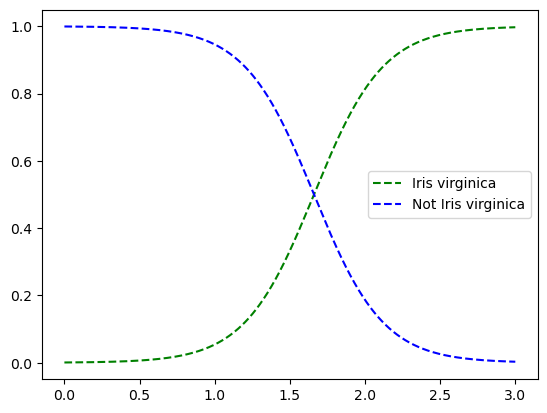

In [107]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.show()

In [108]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [109]:
# 4.6.4 소프트맥스 회귀 - 로지스틱 회귀 모델은 직접 다중 클래스를 지원하도록 일반화 될 수 있다.

In [110]:
# 클래스 k에 대한 소프트맥스 점수

$$s_k(\mathbf {x}) = (\theta^{(k)})^T \mathbf {x}$$

In [111]:
# 소프트맥스 함수

$$\hat p_k = \sigma(s(\mathbf {x}))_k = {exp(s_k(\mathbf {x}) \over \sum_{j=1}^K exp(s_j(\mathbf {x}))}$$

In [112]:
# 소프트맥스 회귀 분류기의 예측

$$\hat {y} = \underset{k} {argmax} \ \sigma(s(\mathbf {x}))_k = \underset{k} {argmax} \ s_k(\mathbf {x})
= \underset{k} {argmax} \ ((\theta^{(k)})^T \mathbf {x})$$

In [113]:
# 크로스 엔트로피 비용 함수

$$J(\Theta) = - {1 \over m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} log(\hat p_k^{(i)})$$

In [114]:
# 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터

$$\nabla_{\theta^{(k)}}J(\Theta) = {1 \over m} \sum_{i=1}^m (\hat {p}_k^{(i)} - y_k^{(i)}) \mathbf {x}^{(i)}$$

In [115]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [116]:
softmax_reg.predict([[5, 2]])

array([2])

In [117]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])